In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from statistics import NormalDist

# https://docs.python.org/3/library/statistics.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [4]:
def zscore(x, mean=0, std_dev=1) -> float:
    """
    Use https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
    If you have data.
    """
    return NormalDist(mu=mean, sigma=std_dev).zscore(x)

def value_from_zscore(z, mean=0, std_dev=1) -> float:
    return mean + (z * std_dev)

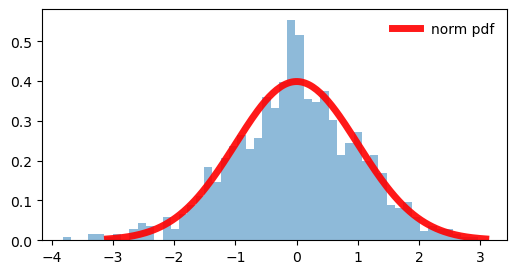

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 200)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.9, label="norm pdf")

r = norm.rvs(size=1000)
ax.hist(r, bins=50, density=True, histtype="stepfilled", alpha=0.5)

ax.legend(loc='best', frameon=False)
fig.show()

P[Z <= 1.27] = 0.89796 - this percentage has a Z of 1.27 or less
-5.0 1.2699999999998663


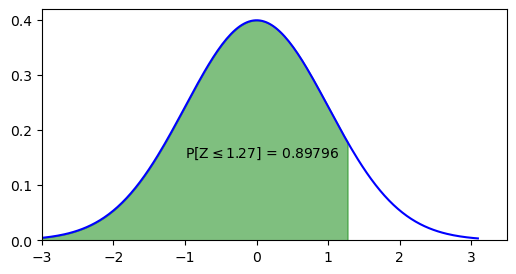

In [6]:
# P of Z <= 1.27. Ans: 0.8980
z = 1.27
p = norm.cdf(z)
print(f"P[Z <= 1.27] = {round(p, 5)} - this percentage has a Z of {z} or less") 

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 200)
ax.plot(x, norm.pdf(x), 'b')
px = np.arange(-5, 1.27+0.01, 0.01)
ax.fill_between(px, norm.pdf(px), color='g', alpha=0.5)
ax.text(-1, 0.15, f"P[Z$\leq$1.27] = {round(p, 5)}")
ax.set_xlim(xmin=-3)
ax.set_ylim(ymin=0)
fig.show()
print(px[0], px[-1])

P[Z <= -1.0] = 0.15866 - this percentage has a Z of -1.0 or more
P[Z > -1.0] = 0.84134 - this percentage has a Z of -1.0 or more
-1.0 4.899999999999999


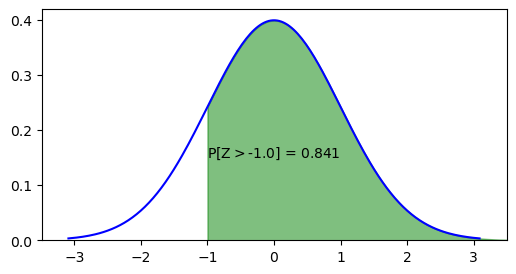

In [7]:
# P of Z > -1.0. Ans: 0.8413.
# P <= -1.0 is 0.1587
z = -1.0
p = norm.sf(z)
print(f"P[Z <= {z}] = {round(norm.cdf(z), 5)} - this percentage has a Z of {z} or more") 
print(f"P[Z > {z}] = {round(p, 5)} - this percentage has a Z of {z} or more") 

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 200)
ax.plot(x, norm.pdf(x), 'b')
px = np.arange(-1, 5, 0.1)
ax.fill_between(px, norm.pdf(px), color='g', alpha=0.5)
ax.text(-1, 0.15, f"P[Z$>${z}] = {round(p, 3)}")
ax.set_xlim(xmax=3.5)
ax.set_ylim(ymin=0)
fig.show()
print(px[0], px[-1])

P[Z <= -1.0] = 0.15866
P[Z <= -2.5] = 0.00621
-2.5 -0.9999999999999987


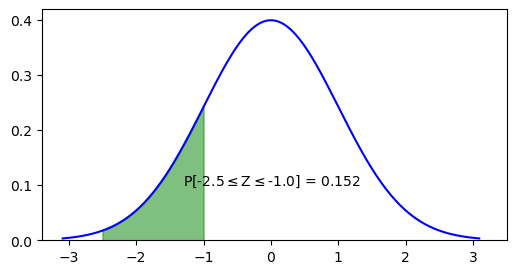

In [8]:
# P <= -2.5 is 0.0062
# P <= -1.0 is 0.1587
z1, z2 = -2.5, -1.0
p1, p2 = norm.cdf(z1), norm.cdf(z2)
print(f"P[Z <= {z2}] = {round(p2, 5)}")
print(f"P[Z <= {z1}] = {round(p1, 5)}") 

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 200)
ax.plot(x, norm.pdf(x), 'b')

px = np.arange(z1, z2+0.01, 0.1)
ax.fill_between(px, norm.pdf(px), color='g', alpha=0.5)
ax.text(-1.3, 0.1, f"P[{z1}$\leq$Z$\leq${z2}] = {round(p2-p1, 3)}")
ax.set_xlim(xmax=3.5)
ax.set_ylim(ymin=0)
fig.show()
print(px[0], px[-1])

In [9]:
# Find Z score for p95 (percentile separating bottom 95%). Ans: 1.65.
norm.ppf(0.95)

1.644853626951472

In [16]:
x, mu, std = 72, 68.6, 2.8
p = norm.sf(x, loc=mu, scale=std)
z = zscore(x, mean=mu, std_dev=std)
print(p) # 0.1123
print(z) # 1.214

0.11231931946188978
1.2142857142857164


In [17]:
mu, std = 63.7, 2.9
p2 = norm.cdf(77, loc=mu, scale=std)
p1 = norm.cdf(64, loc=mu, scale=std)

z2 = zscore(77, mean=mu, std_dev=std)
z1 = zscore(64, mean=mu, std_dev=std)

print(f"percentage of women who meet the height req: {p2-p1}")
print(f"p2 = {p2}. p1 = {p1}")
print(f"z2 = {z2}. z1 = {z1}")
# Ans: 45.88% of women meet requirements.

percentage of women who meet the height req: 0.4588013426636576
p2 = 0.9999977431433954. p1 = 0.5411964004797378
z2 = 4.586206896551723. z1 = 0.10344827586206799


# Central Limit Theorem

In [22]:
def zscore_sample_mean(sample_mean, n, pop_mu, pop_std) -> float:
    """
    Mean of all sample means approaches the population mean.
    Standard deviation of all sample means (Standard Error of the Mean) is given by
        sem = pop_std / sqrt(n)
    """
    sem = pop_std / np.sqrt(n)
    return (sample_mean - pop_mu) / sem

In [24]:
# Elevator has capacity of 4_000 lbs or 27 people.
# Adult male weight pop mean is 189 with std of 39.
# Allowed wieght for 27 passengers would be 4_000 / 27 = 148 lbs.

# P of 1 adult male weighting more than 148lbs.
p_of_1 = norm.sf(148, loc=189, scale=39)
print(f"P[>= weight 148] = {p_of_1}") # Ans: 0.8531.

# P of 27 adult males weighting more than 148.
p_of_27 = norm.sf(zscore_sample_mean(148, n=27, pop_mu=189, pop_std=39))
print(f"P[>= 27 weight 148] = {p_of_27}") # Ans: 0.9999.

P[>= weight 148] = 0.8534354659559187
P[>= 27 weight 148] = 0.999999976542326


In [28]:
# Assume body temperature has mean of 98.6 and std of 0.62.
# What is the probability of measuring body temps in a sample of 106 and finding a mean of
# 98.2 or lower.

z_central_limit = zscore_sample_mean(98.2, n=106, pop_mu=98.6, pop_std=0.62)
p = norm.cdf(z_central_limit)
print(f"P[mean body temp <= 98.2] = {p}") # Ans: 0.0+.
print(f"central limit assumed z = {z_central_limit}") # Ans: -6.664.

P[mean body temp <= 98.2] = 1.5436874787991305e-11
central limit assumed z = -6.642342026443084


If sampling without replacement and sample size is greater than 5% of total population, then multiply
the standard error by
$$
\sqrt{ \frac{N-n}{N-1} }
$$

# Assess Normality

See https://www.statology.org/normality-test-python/

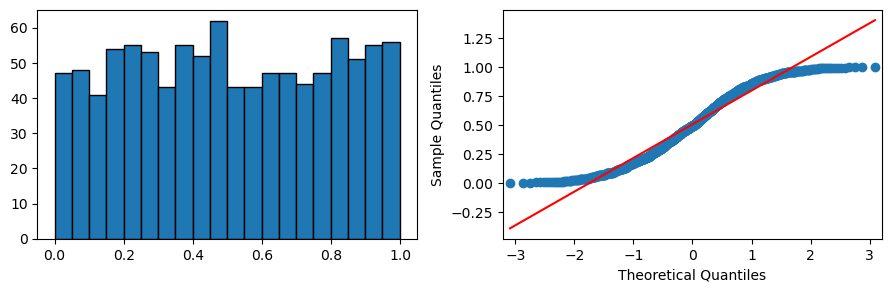

In [54]:
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# probplot generates a probability plot, which should not be confused with a Q-Q or a P-P plot.
# A probability plot, https://en.wikipedia.org/wiki/Probability_plot, c

from scipy.stats import uniform
import statsmodels.api as sm

rng = np.random.default_rng()
x_uniform = uniform.rvs(size=1000, random_state=rng)

fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(121)
ax1.hist(x_uniform, edgecolor='black', bins=20)

ax2 = fig.add_subplot(122)
sm.qqplot(x_uniform, ax=ax2, line='s')

fig.tight_layout(pad=1.0)
plt.show()